In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', 100)

df = pd.read_csv("high-school-directory.csv")
df.shape, df.head()


((435, 69),
       dbn                                        school_name    borough  \
 0  27Q260          Frederick Douglass Academy VI High School     Queens   
 1  21K559        Life Academy High School for Film and Music   Brooklyn   
 2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
 3  08X305                               Pablo Neruda Academy      Bronx   
 4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   
 
   building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
 0          Q465  718-471-2154  718-471-2890             9.0              12   
 1          K400  718-333-7750  718-333-7775             9.0              12   
 2          K026  718-574-2820  718-574-2821             9.0              12   
 3          X450  718-824-1682  718-824-1663             9.0              12   
 4          M485  212-496-0700  212-724-5748             9.0              12   
 
    expgrade_span_min  expgrade_span_max  \
 0  

In [2]:
# Filter Brooklyn only
brooklyn = df[df['borough'].astype(str).str.upper() == 'BROOKLYN']

# Count how many unique schools in Brooklyn
q41_total_unique = brooklyn['dbn'].nunique()
print("Q4.1 – Total unique schools in Brooklyn:", q41_total_unique)


Q4.1 – Total unique schools in Brooklyn: 121


In [3]:
# Convert grade columns to numbers
def to_num(x):
    s = str(x).strip().upper().replace('K','0')
    try:
        return int(float(s))
    except:
        return None

bk = brooklyn.copy()
bk['min_g'] = bk['grade_span_min'].apply(to_num)
bk['max_g'] = bk['grade_span_max'].apply(to_num)

# Find schools that offer grade 9
has_9 = bk[(bk['min_g'].notna()) & (bk['max_g'].notna()) &
           (bk['min_g'] <= 9) & (bk['max_g'] >= 9)]

q42_grade9 = has_9['dbn'].nunique()
print("Q4.2 – Brooklyn schools offering Grade 9:", q42_grade9)


Q4.2 – Brooklyn schools offering Grade 9: 121


In [4]:
# Count unique schools per borough
school_counts = df.groupby('borough')['dbn'].nunique().reset_index(name='unique_schools')

# Average students per borough
df['total_students'] = pd.to_numeric(df['total_students'], errors='coerce')
avg_students = df.groupby('borough')['total_students'].mean().reset_index(name='avg_students')

# Summary statistics for grade_span_max
df['grade_span_max'] = pd.to_numeric(df['grade_span_max'], errors='coerce')
summary_grade_max = df.groupby('borough')['grade_span_max'].describe()

school_counts, avg_students, summary_grade_max.head()


(         borough  unique_schools
 0          Bronx             118
 1       Brooklyn             121
 2      Manhattan             106
 3         Queens              80
 4  Staten Island              10,
          borough  avg_students
 0          Bronx    490.406780
 1       Brooklyn    699.134454
 2      Manhattan    589.825243
 3         Queens   1046.644737
 4  Staten Island   1847.500000,
                count       mean       std   min   25%   50%   75%   max
 borough                                                                
 Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
 Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
 Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
 Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
 Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0)

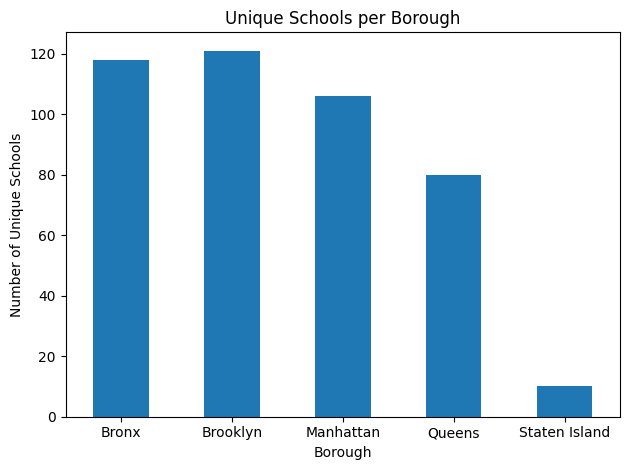

In [5]:
# Bar chart of unique schools per borough
plt.figure()
school_counts.set_index('borough')['unique_schools'].plot(kind='bar', rot=0)
plt.title('Unique Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Unique Schools')
plt.tight_layout()
plt.show()


## Q7 – Key Insights

- Brooklyn has the highest number of unique schools (121), followed by the Bronx (118).
- Staten Island has the fewest schools (10) but the largest average school size (~1470 students).
- All Brooklyn schools offer Grade 9, showing strong high school representation in that borough.
- Queens schools are fewer but tend to be larger on average (~1046 students per school).
- Grade spans across all boroughs mostly end at Grade 12, confirming full high school coverage.
